## Importing Libraries

In [294]:
# For Reshaping and Array Conversions
import numpy as np

# For Reading CSV File
import pandas as pd

# Converting Categorical Columns
from sklearn.preprocessing import LabelEncoder

# Importing Decision Tree
from sklearn.tree import DecisionTreeClassifier,plot_tree

# For Model Splitting
from sklearn.model_selection import train_test_split

# For Validation
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# For Ignoring Warnings
import warnings
warnings.filterwarnings('ignore')

# For Tree Visualization
import matplotlib.pyplot as plt

## Importing Dataset with Continuous Values

In [166]:
df1 =  pd.read_csv("/content/Golf Dataset Continuous Values.txt")

print("Dataset is: \n")
print(df1)

print("\nColumns of Dataset are:\n")
print(df1.columns)

Dataset is: 

     Outlook  Temperature  Humidity    Wind Decision
0      Sunny           85        85    Weak       No
1      Sunny           80        90  Strong       No
2   Overcast           83        78    Weak      Yes
3       Rain           70        96    Weak      Yes
4       Rain           68        80    Weak      Yes
5       Rain           65        70  Strong       No
6   Overcast           64        65  Strong      Yes
7      Sunny           72        95    Weak       No
8      Sunny           69        70    Weak      Yes
9       Rain           75        80    Weak      Yes
10     Sunny           75        70  Strong      Yes
11  Overcast           72        90  Strong      Yes
12  Overcast           81        75    Weak      Yes
13      Rain           71        80  Strong       No

Columns of Dataset are:

Index(['Outlook', 'Temperature', 'Humidity', 'Wind', 'Decision'], dtype='object')


## Encoding Categorical Columns

In [167]:
# Converting Categorical Columns
from sklearn.preprocessing import LabelEncoder

# Assuming 'x_train' contains your features, and some of them are categorical
label_encoder = LabelEncoder()

categorical_columns = ['Outlook', 'Wind']

for column in categorical_columns:
    df1[column] = label_encoder.fit_transform(df1[column])

# Printing After Encoding
print("Dataset after Encoding is:\n")
print(df1)

Dataset after Encoding is:

    Outlook  Temperature  Humidity  Wind Decision
0         2           85        85     1       No
1         2           80        90     0       No
2         0           83        78     1      Yes
3         1           70        96     1      Yes
4         1           68        80     1      Yes
5         1           65        70     0       No
6         0           64        65     0      Yes
7         2           72        95     1       No
8         2           69        70     1      Yes
9         1           75        80     1      Yes
10        2           75        70     0      Yes
11        0           72        90     0      Yes
12        0           81        75     1      Yes
13        1           71        80     0       No


## Specifying Input and Output

In [289]:
X, Y = df1.drop(['Decision'], axis = 1), df1['Decision']

## Splitting into Training and Testing Sets

In [290]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size= 0.8)

## Applying Model

In [291]:
# Making a decison tree model with best split medium and entropy criterion
# By Default it is best we can specify it to random
dt1 = DecisionTreeClassifier(splitter = 'random', criterion='entropy', random_state = 4225)

# Training
dt1.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=4225,
                       splitter='random')

## Training Validation

In [274]:
train_predict = dt1.predict(x_train)

print("Training Accuracy is:", accuracy_score(y_train, train_predict) * 100)
print("\n\nConfusion Matrix is:\n")
print(confusion_matrix(y_train, train_predict))

print("\n\nClassifcation Report is:\n")
print(classification_report(y_train, train_predict))

Training Accuracy is: 100.0


Confusion Matrix is:

[[3 0]
 [0 8]]


Classifcation Report is:

              precision    recall  f1-score   support

          No       1.00      1.00      1.00         3
         Yes       1.00      1.00      1.00         8

    accuracy                           1.00        11
   macro avg       1.00      1.00      1.00        11
weighted avg       1.00      1.00      1.00        11



## Testing Validation

In [275]:
test_predict = dt1.predict(x_test)

print("Testing Accuracy is:", accuracy_score(y_test, test_predict) * 100)
print("\n\nConfusion Matrix is:\n")
print(confusion_matrix(y_test, test_predict))

print("\n\nClassifcation Report is:\n")
print(classification_report(y_test, test_predict))

Testing Accuracy is: 66.66666666666666


Confusion Matrix is:

[[1 1]
 [0 1]]


Classifcation Report is:

              precision    recall  f1-score   support

          No       1.00      0.50      0.67         2
         Yes       0.50      1.00      0.67         1

    accuracy                           0.67         3
   macro avg       0.75      0.75      0.67         3
weighted avg       0.83      0.67      0.67         3



## Visualizing Tree

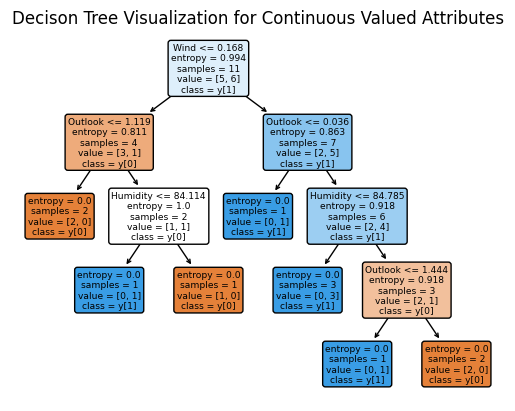

In [292]:
# Visualize the decision tree
plot_tree(dt1, filled=True, feature_names=x_train.columns, class_names=True, rounded=True)

# Adding title
plt.title("Decison Tree Visualization for Continuous Valued Attributes")

# Show the plot
plt.show()

## Seeing Feature Importance

If a Feature has 0 importance then it would not be used for splitting.

The decision tree algorithm dynamically decides the splitting criteria at each node based on the data. This means that even if a feature has high importance, it may not be used as the first splitting criterion. The algorithm considers all features and their potential splits, choosing the one that maximizes information gain or reduces impurity the most at that particular node.

In [293]:
# Making DataFrame for Features and their Importance
feature_imp_1 = pd.DataFrame({"Features" : x_train.columns, "Importance" : dt1.feature_importances_})

# Printing Dataframe
print("Features and their Importance in Dataset is:\n")
print(feature_imp_1)

Features and their Importance in Dataset is:

      Features  Importance
0      Outlook    0.414481
1  Temperature    0.000000
2     Humidity    0.434859
3         Wind    0.150661


## Importing Normal Dataset

In [244]:
df2 =  pd.read_csv("/content/Golf Dataset.csv")

print("Dataset is: \n")
print(df2)

print("\nColumns of Dataset are:\n")
print(df2.columns)

Dataset is: 

     Outlook Temperature Humidity  Windy Play
0      sunny         hot     high  False   no
1      sunny         hot     high   True   no
2   overcast         hot     high  False  yes
3      rainy        mild     high  False  yes
4      rainy        cool   normal  False  yes
5      rainy        cool   normal   True   no
6   overcast        cool   normal   True  yes
7      sunny        mild     high  False   no
8      sunny        cool   normal  False  yes
9      rainy        mild   normal  False  yes
10     sunny        mild   normal   True  yes
11  overcast        mild     high   True  yes
12  overcast         hot   normal  False  yes
13     rainy        mild     high   True   no

Columns of Dataset are:

Index(['Outlook', 'Temperature', 'Humidity', 'Windy', 'Play'], dtype='object')


In [245]:
# Converting Categorical Columns
from sklearn.preprocessing import LabelEncoder

# Assuming 'x_train' contains your features, and some of them are categorical
label_encoder = LabelEncoder()

categorical_columns = ['Outlook', 'Temperature', 'Humidity', 'Windy']

for column in categorical_columns:
    df2[column] = label_encoder.fit_transform(df2[column])

print("Dataset after Encoding is:\n")
print(df2)

Dataset after Encoding is:

    Outlook  Temperature  Humidity  Windy Play
0         2            1         0      0   no
1         2            1         0      1   no
2         0            1         0      0  yes
3         1            2         0      0  yes
4         1            0         1      0  yes
5         1            0         1      1   no
6         0            0         1      1  yes
7         2            2         0      0   no
8         2            0         1      0  yes
9         1            2         1      0  yes
10        2            2         1      1  yes
11        0            2         0      1  yes
12        0            1         1      0  yes
13        1            2         0      1   no


## Dividing into Input and Output

In [278]:
X, Y = df2.drop(['Play'], axis = 1), df2['Play']

## Splitting into Training And Testing set

In [279]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size= 0.8)

## Implementing Decision Tree

In [280]:
dt2 = DecisionTreeClassifier(splitter = 'random',criterion = 'entropy', random_state = 42)

# Training
dt2.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42, splitter='random')

In [281]:
train_predict = dt2.predict(x_train)

print("Training Accuracy is:", accuracy_score(y_train, train_predict) * 100)
print("\n\nConfusion Matrix is:\n")
print(confusion_matrix(y_train, train_predict))

print("\n\nClassifcation Report is:\n")
print(classification_report(y_train, train_predict))

Training Accuracy is: 100.0


Confusion Matrix is:

[[4 0]
 [0 7]]


Classifcation Report is:

              precision    recall  f1-score   support

          no       1.00      1.00      1.00         4
         yes       1.00      1.00      1.00         7

    accuracy                           1.00        11
   macro avg       1.00      1.00      1.00        11
weighted avg       1.00      1.00      1.00        11



In [282]:
test_predict = dt2.predict(x_test)

print("Testing Accuracy is:", accuracy_score(y_test, test_predict) * 100)
print("\n\nConfusion Matrix is:\n")
print(confusion_matrix(y_test, test_predict))

print("\n\nClassification Report is:\n")
print(classification_report(y_test, test_predict))

Testing Accuracy is: 66.66666666666666


Confusion Matrix is:

[[1 0]
 [1 1]]


Classification Report is:

              precision    recall  f1-score   support

          no       0.50      1.00      0.67         1
         yes       1.00      0.50      0.67         2

    accuracy                           0.67         3
   macro avg       0.75      0.75      0.67         3
weighted avg       0.83      0.67      0.67         3



## Visualizing tree

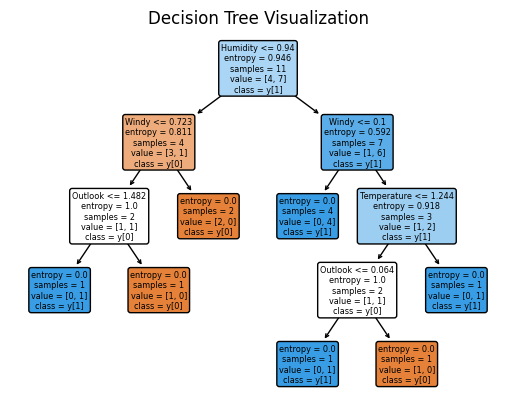

In [283]:
# Visualize the decision tree
plot_tree(dt2, filled=True, feature_names=x_train.columns, class_names=True, rounded=True)

# Add title
plt.title("Decision Tree Visualization")

# Show the plot
plt.show()

## Seeing Feature Importance

If a Feature has 0 importance then it would not be used for splitting.

The decision tree algorithm dynamically decides the splitting criteria at each node based on the data. This means that even if a feature has high importance, it may not be used as the first splitting criterion. The algorithm considers all features and their potential splits, choosing the one that maximizes information gain or reduces impurity the most at that particular node.

In [284]:
# Making DataFrame for Features and their Importance
feature_imp_2 = pd.DataFrame({"Features" : x_train.columns, "Importance" : dt2.feature_importances_})

# Printing Dataframe
print("Features and their Importance in Dataset is:\n")
print(feature_imp_2)

Features and their Importance in Dataset is:

      Features  Importance
0      Outlook    0.384532
1  Temperature    0.072570
2     Humidity    0.289883
3        Windy    0.253016


## Reading Dataset with one Continuous Column to see splitting Value

In [192]:
df3 = pd.read_excel("/content/Continuous Values Decision Tree.xlsx")

print("Dataset is:\n")
print(df3)

print("\nColumns of Dataset are:\n")
print(df3.columns)

Dataset is:

   Temperature Play Tennis
0           40          No
1           48          No
2           60         Yes
3           72         Yes
4           80         Yes
5           90          No

Columns of Dataset are:

Index(['Temperature', 'Play Tennis'], dtype='object')


## Splitting into Input and Output and Reshaping

In [221]:
X, Y = df3['Temperature'], df3['Play Tennis']

X, Y = np.array(X), np.array(Y)

X, Y = X.reshape(-1,1), Y.reshape(-1,1)

## Building Model

In [222]:
dt3 = DecisionTreeClassifier(splitter = 'best',criterion = 'entropy')

# Training
dt3.fit(X,Y)

DecisionTreeClassifier(criterion='entropy')

## Validation

In [198]:
test_predict = dt3.predict(X)

print("Testing Accuracy is:", accuracy_score(Y, test_predict) * 100)
print("\n\nConfusion Matrix is:\n")
print(confusion_matrix(Y, test_predict))

print("\n\nClassifcation Report is:\n")
print(classification_report(Y, test_predict))

Testing Accuracy is: 100.0


Confusion Matrix is:

[[3 0]
 [0 3]]


Classifcation Report is:

              precision    recall  f1-score   support

          No       1.00      1.00      1.00         3
         Yes       1.00      1.00      1.00         3

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6



## Visualizing

Since we can see that in this dataset the best splitting criterion is 54 which is the average of 48 and 60 as the class is changing from No to Yes, If there were more Such changes we will find for that as well which is average of 80 and 90 which is 85.

After this we will calculate the Information Gain for Both the Values and the Value which will give the highest IG will be the Splitting Criterion which is 54 here.

After 54 we wil split it using 85.

If the last entry would have been Yes then using only 54 we could have splitted it but since it is No we have to further repeat the algorithm.

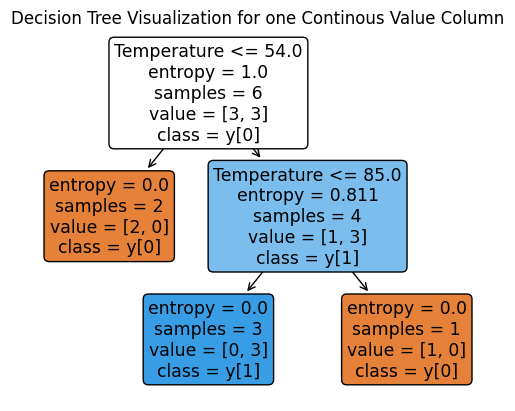

In [224]:
columns = ['Temperature']

# Visualize the decision tree
plot_tree(dt3, filled=True, feature_names=columns, class_names=True, rounded=True)

# Adding Title
plt.title("Decision Tree Visualization for one Continous Value Column")

# Show the plot
plt.show()

## Seeing Importance of Columns in Dataset

It is Showing 1 because this dataset has only one column and thus it is the most important one.

In [239]:
# Making DataFrame for Features and their Importance
feature_imp_3 = pd.DataFrame({"Features" : columns, "Importance" : dt3.feature_importances_})

# Printing Dataframe
print("Features and their Importance in Dataset is:\n")
print(feature_imp_3)

Features and their Importance in Dataset is:

      Features  Importance
0  Temperature         1.0
